# 1 Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 2 Data

In [2]:
import pandas as pd
df = pd.read_csv("Bone Tumor Dataset.csv")

## 2.1 Brief Explanation of the Data:

Column Descriptors:

Patient ID: A unique identifier for each patient.

Sex: The patient's sex.

Age: The patient's age at the time of diagnosis.

Grade: The grade of the tumor, which is a measure of how aggressive the tumor is.

Histological type: The type of tumor, such as osteosarcoma or Ewing sarcoma.

MSKCC type: The MSKCC type of the tumor, which is a more specific classificationof the tumor.

Site of primary STS: The location of the tumor in the bone.

Status (NED, AWD, D): The patient's status, which can be NED (no evidence of disease), AWD (alive with disease), or D (dead).

Treatment: The treatment that the patient received, such as surgery, radiation therapy, or chemotherapy.


# 3. EDA 

In [3]:
df.head()

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,STS_001,Female,63,High,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Radiotherapy + Surgery
1,STS_002,Female,54,Intermediate,pleiomorphic leiomyosarcoma,MFH,left thigh,D,Surgery + Chemotherapy
2,STS_003,Male,22,Intermediate,synovial sarcoma,MFH,right buttock,D,Radiotherapy + Surgery
3,STS_004,Female,54,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
4,STS_005,Male,63,High,pleiomorphic spindle cell undifferentiated,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy


In [4]:
print("Dataset Information:\n")
df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient ID            500 non-null    object
 1   Sex                   500 non-null    object
 2   Age                   500 non-null    int64 
 3   Grade                 500 non-null    object
 4   Histological type     500 non-null    object
 5   MSKCC type            500 non-null    object
 6   Site of primary STS   500 non-null    object
 7   Status (NED, AWD, D)  500 non-null    object
 8   Treatment             500 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.3+ KB


In [5]:
df.Treatment.unique()

array(['Radiotherapy + Surgery', 'Surgery + Chemotherapy',
       'Radiotherapy + Surgery + Chemotherapy'], dtype=object)

In [6]:
df.shape

(500, 9)

In [7]:
print("Columns:")
print(df.columns)

Columns:
Index(['Patient ID', 'Sex', 'Age', 'Grade', 'Histological type', 'MSKCC type',
       'Site of primary STS', 'Status (NED, AWD, D)', 'Treatment'],
      dtype='object')


In [8]:
print("Unique Values:")
print(df.nunique())

Unique Values:
Patient ID              500
Sex                       2
Age                      65
Grade                     2
Histological type        13
MSKCC type                3
Site of primary STS       7
Status (NED, AWD, D)      3
Treatment                 3
dtype: int64


In [9]:
df.isnull().sum() 

Patient ID              0
Sex                     0
Age                     0
Grade                   0
Histological type       0
MSKCC type              0
Site of primary STS     0
Status (NED, AWD, D)    0
Treatment               0
dtype: int64

In [10]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Patient ID': ['STS_001' 'STS_002' 'STS_003' 'STS_004' 'STS_005' 'STS_006' 'STS_007'
 'STS_008' 'STS_009' 'STS_010' 'STS_011' 'STS_012' 'STS_013' 'STS_014'
 'STS_015' 'STS_016' 'STS_017' 'STS_018' 'STS_019' 'STS_020' 'STS_021'
 'STS_022' 'STS_023' 'STS_024' 'STS_025' 'STS_026' 'STS_027' 'STS_028'
 'STS_029' 'STS_030' 'STS_031' 'STS_032' 'STS_033' 'STS_034' 'STS_035'
 'STS_036' 'STS_037' 'STS_038' 'STS_039' 'STS_040' 'STS_041' 'STS_042'
 'STS_043' 'STS_044' 'STS_045' 'STS_046' 'STS_047' 'STS_048' 'STS_049'
 'STS_050' 'STS_051' 'STS_052' 'STS_053' 'STS_054' 'STS_055' 'STS_056'
 'STS_057' 'STS_058' 'STS_059' 'STS_060' 'STS_061' 'STS_062' 'STS_063'
 'STS_064' 'STS_065' 'STS_066' 'STS_067' 'STS_068' 'STS_069' 'STS_070'
 'STS_071' 'STS_072' 'STS_073' 'STS_074' 'STS_075' 'STS_076' 'STS_077'
 'STS_078' 'STS_079' 'STS_080' 'STS_081' 'STS_082' 'STS_083' 'STS_084'
 'STS_085' 'STS_086' 'STS_087' 'STS_088' 'STS_089' 'STS_090' 'STS_091'
 'STS_092' 'STS_093' 'STS_094' 'STS_095

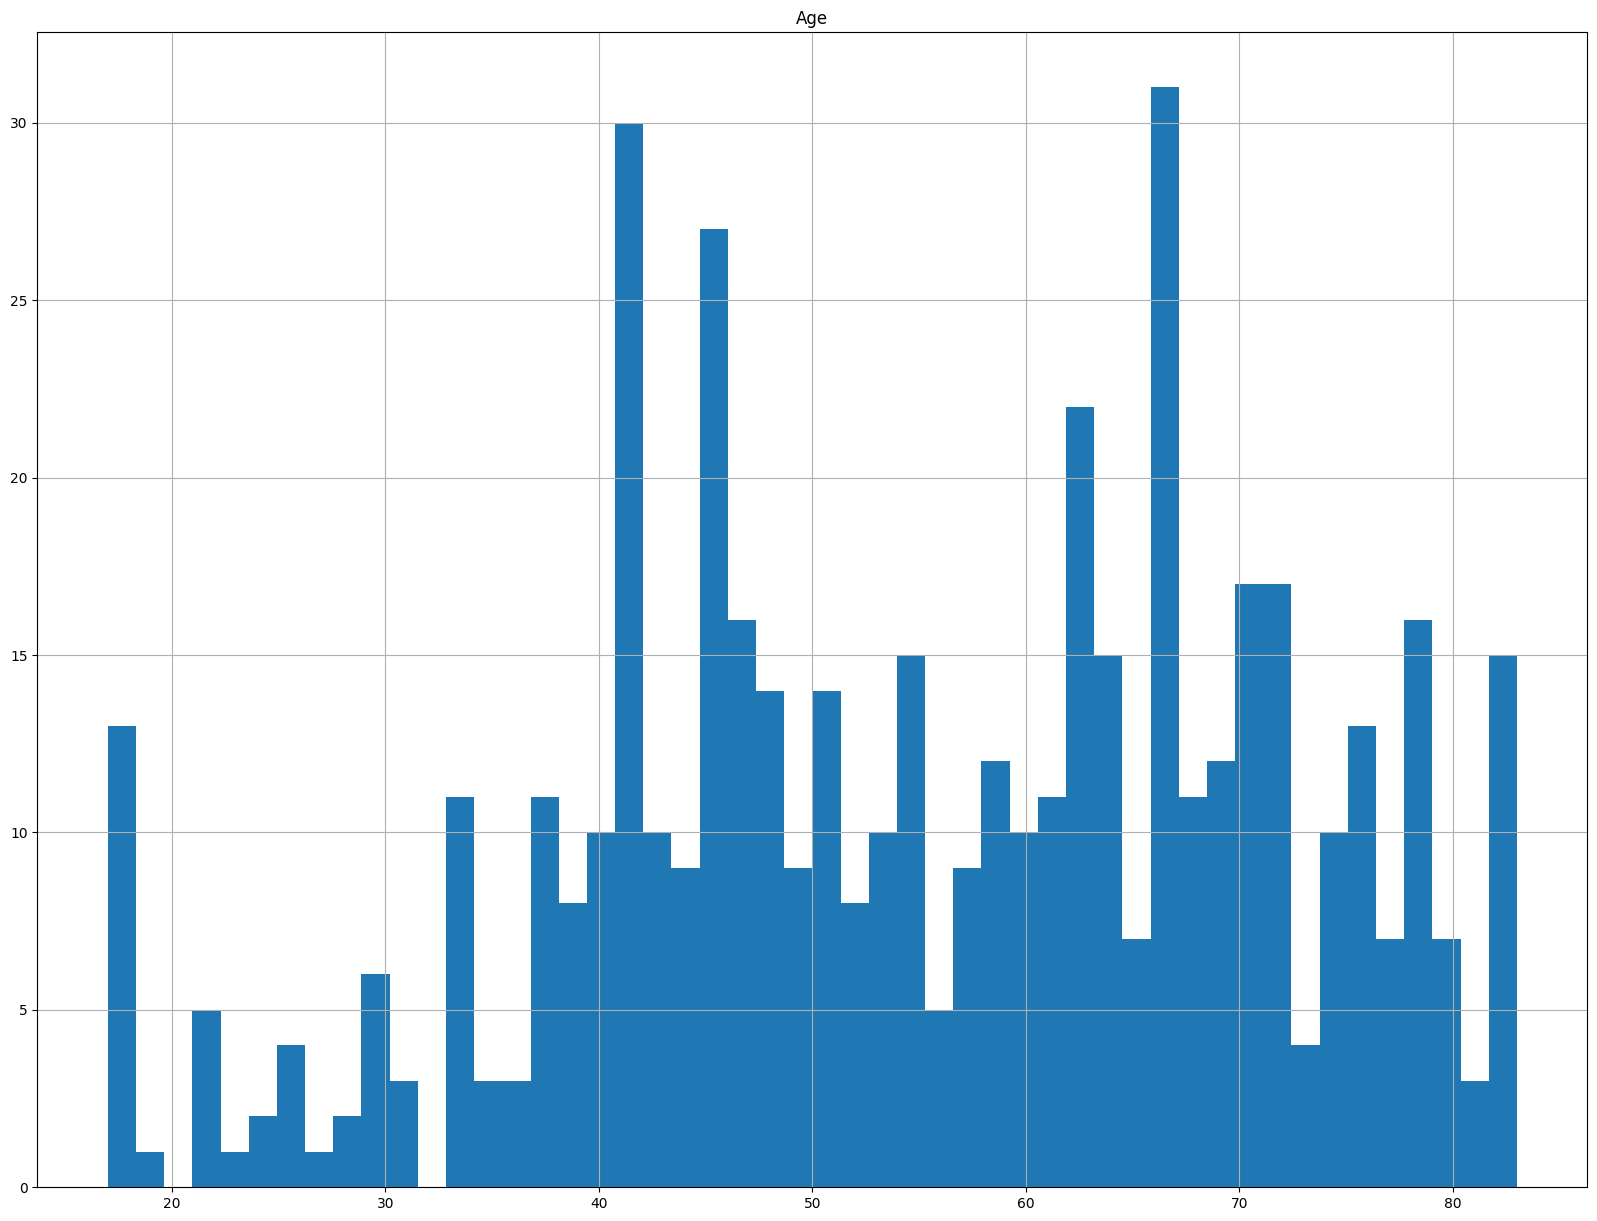

In [11]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

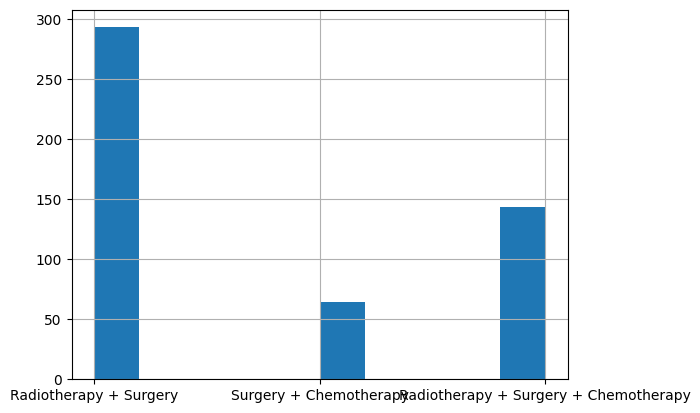

In [12]:
df["Treatment"].hist()

<Axes: xlabel='Histological type', ylabel='Treatment'>

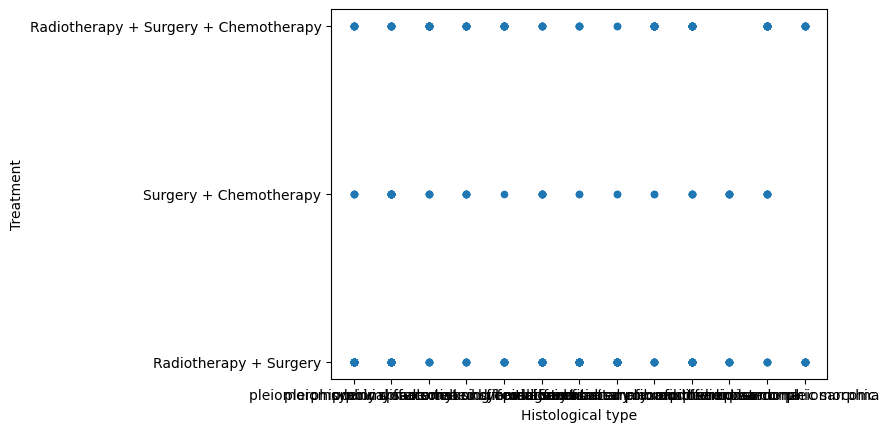

In [13]:
df.plot(kind="scatter", x="Histological type", y="Treatment")

# 3.1 Categorical Data Distribution

In [14]:
categorical_columns = df.select_dtypes(include=['object', 'category'])

In [15]:
categorical_columns

,Patient ID,Sex,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,STS_001,Female,High,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Radiotherapy + Surgery
1,STS_002,Female,Intermediate,pleiomorphic leiomyosarcoma,MFH,left thigh,D,Surgery + Chemotherapy
2,STS_003,Male,Intermediate,synovial sarcoma,MFH,right buttock,D,Radiotherapy + Surgery
3,STS_004,Female,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
4,STS_005,Male,High,pleiomorphic spindle cell undifferentiated,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy
...,...,...,...,...,...,...,...,...
495,STS_496,Male,Intermediate,epithelioid sarcoma,MFH,left thigh,D,Surgery + Chemotherapy
496,STS_497,Male,High,poorly differentiated synovial sarcoma,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy
497,STS_498,Female,Intermediate,pleomorphic sarcoma,Synovial sarcoma,right thigh,NED,Radiotherapy + Surgery
498,STS_499,Male,High,synovial sarcoma,MFH,right thigh,D,Radiotherapy + Surgery + Chemotherapy


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [17]:
df

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,0,0,63,0,5,0,3,2,0
1,1,0,54,1,5,1,2,1,2
2,2,1,22,1,10,1,4,1,0
3,3,0,54,1,10,0,6,2,0
4,4,1,63,0,6,1,5,0,1
...,...,...,...,...,...,...,...,...,...
495,495,1,31,1,0,1,2,1,2
496,496,1,41,0,8,1,5,0,1
497,497,0,60,1,7,2,6,2,0
498,498,1,43,0,10,1,6,1,1


# 3.3. Correlation Analysis

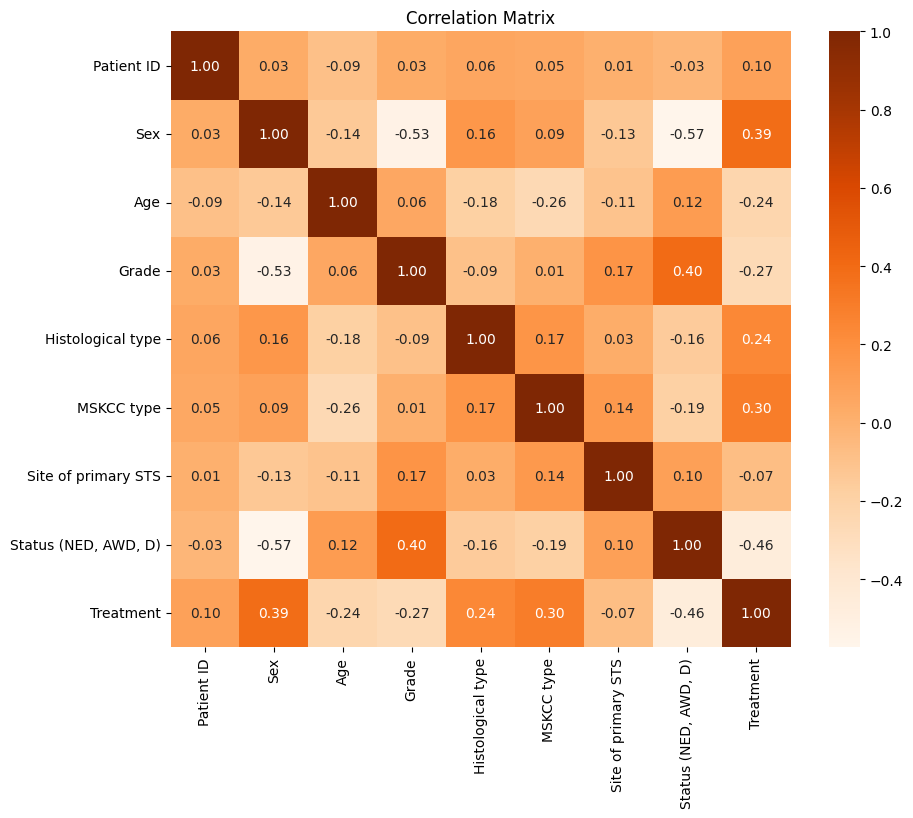

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
df.describe()

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,0.400000,55.396000,0.564000,6.198000,0.974000,3.410000,1.270000,0.542000
std,144.481833,0.490389,16.131573,0.496384,3.488141,0.741906,1.973243,0.803986,0.710807
min,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.750000,0.000000,44.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000
50%,249.500000,0.000000,56.000000,1.000000,5.000000,1.000000,3.000000,1.000000,0.000000
75%,374.250000,1.000000,68.000000,1.000000,10.000000,2.000000,6.000000,2.000000,1.000000
max,499.000000,1.000000,83.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Patient ID            500 non-null    int64
 1   Sex                   500 non-null    int64
 2   Age                   500 non-null    int64
 3   Grade                 500 non-null    int64
 4   Histological type     500 non-null    int64
 5   MSKCC type            500 non-null    int64
 6   Site of primary STS   500 non-null    int64
 7   Status (NED, AWD, D)  500 non-null    int64
 8   Treatment             500 non-null    int64
dtypes: int64(9)
memory usage: 35.3 KB


In [21]:
df.drop(["Patient ID","Sex"], axis=1,inplace=True)  

In [22]:
df

,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,63,0,5,0,3,2,0
1,54,1,5,1,2,1,2
2,22,1,10,1,4,1,0
3,54,1,10,0,6,2,0
4,63,0,6,1,5,0,1
...,...,...,...,...,...,...,...
495,31,1,0,1,2,1,2
496,41,0,8,1,5,0,1
497,60,1,7,2,6,2,0
498,43,0,10,1,6,1,1


# 4.Data Splitting

In [23]:
x = df.drop(['Treatment'], axis=1)
y = df['Treatment']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 5. StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 6 RandomForestClassifier Model Training and Evaluation

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)


accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
confusion_random_forest = confusion_matrix(y_test, y_pred_random_forest)
classification_rep_random_forest = classification_report(y_test, y_pred_random_forest)


print("Random Forest Model:")
print(f"Accuracy: {accuracy_random_forest:.2f}")
print("Confusion Matrix:\n", confusion_random_forest)
print("Classification Report:\n", classification_rep_random_forest)


Random Forest Model:
Accuracy: 0.77
Confusion Matrix:
 [[53  1  2]
 [ 6 18  0]
 [10  4  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85        56
           1       0.78      0.75      0.77        24
           2       0.75      0.30      0.43        20

    accuracy                           0.77       100
   macro avg       0.77      0.67      0.68       100
weighted avg       0.77      0.77      0.74       100



# 7. Saving The Model

In [27]:
import joblib
joblib.dump(random_forest_model, 'random_forest.pkl')

['random_forest.pkl']